# Estudos adicionais, baseados no desafio

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import mplfinance as mpf

pd.plotting.register_matplotlib_converters()
#%matplotlib inline

## Análise de dados dos FIIs.

In [2]:
fiis_df = pd.read_excel('01-dados-limpos/fundos_imob.xlsx')

fiis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TICKER                  432 non-null    object 
 1   PRECO                   432 non-null    float64
 2   ULTIMO DIVIDENDO        432 non-null    float64
 3   DY                      432 non-null    float64
 4   VALOR PATRIMONIAL COTA  432 non-null    float64
 5   P/VP                    432 non-null    float64
 6   LIQUIDEZ MEDIA DIARIA   432 non-null    float64
 7   PERCENTUAL EM CAIXA     432 non-null    float64
 8   CAGR DIVIDENDOS 3 ANOS  432 non-null    float64
 9   CAGR VALOR CORA 3 ANOS  432 non-null    float64
 10  PATRIMONIO              432 non-null    float64
 11  N COTISTAS              432 non-null    int64  
 12  GESTAO                  432 non-null    object 
 13  N COTAS                 432 non-null    int64  
dtypes: float64(10), int64(2), object(2)
memory

In [3]:
fiis_df.drop(fiis_df[fiis_df['PRECO'] == 0].index, inplace=True)
fiis_df.drop(fiis_df[fiis_df['PATRIMONIO'] == 0.0].index, inplace=True)
fiis_df.drop(fiis_df[fiis_df['N COTISTAS'] == 0].index, inplace=True)

In [4]:
# Aplicando IQR para remover outliers

IQ1 = np.percentile(fiis_df['P/VP'], 25)
IQ3 = np.percentile(fiis_df['P/VP'], 75)

IQR = (IQ3 - IQ1)

lower_bound = IQ1 - IQR * 1.5
upper_bound = IQ3 + IQR * 1.5

fiis_df.drop(fiis_df[(fiis_df['P/VP'] < lower_bound) | (fiis_df['P/VP'] > upper_bound)].index, inplace=True)

# fiis_df.drop(fiis_df[(fiis_df['P/VP'] < np.percentile(fiis_df['P/VP'], 5)) | (fiis_df['P/VP'] > np.percentile(fiis_df['P/VP'], 95))].index, inplace=True)


In [5]:
IQ1 = np.percentile(fiis_df['PRECO'], 25)
IQ3 = np.percentile(fiis_df['PRECO'], 75)

IQR = (IQ3 - IQ1)

lower_bound = IQ1 - IQR * 1.5
upper_bound = IQ3 + IQR * 1.5

fiis_df.drop(fiis_df[(fiis_df['PRECO'] < lower_bound) | (fiis_df['PRECO'] > upper_bound)].index, inplace=True)


In [6]:
from sklearn.ensemble import IsolationForest

colunas_numericas = fiis_df.columns.to_list()
colunas_numericas.remove('TICKER')
colunas_numericas.remove('GESTAO')

model = IsolationForest(n_estimators=100, contamination=0.01)
model.fit(fiis_df[colunas_numericas])

# identify outliers
outliers = model.predict(fiis_df[colunas_numericas]) == -1

fiis_df.drop(fiis_df[outliers].index, inplace=True)


/home/andre/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


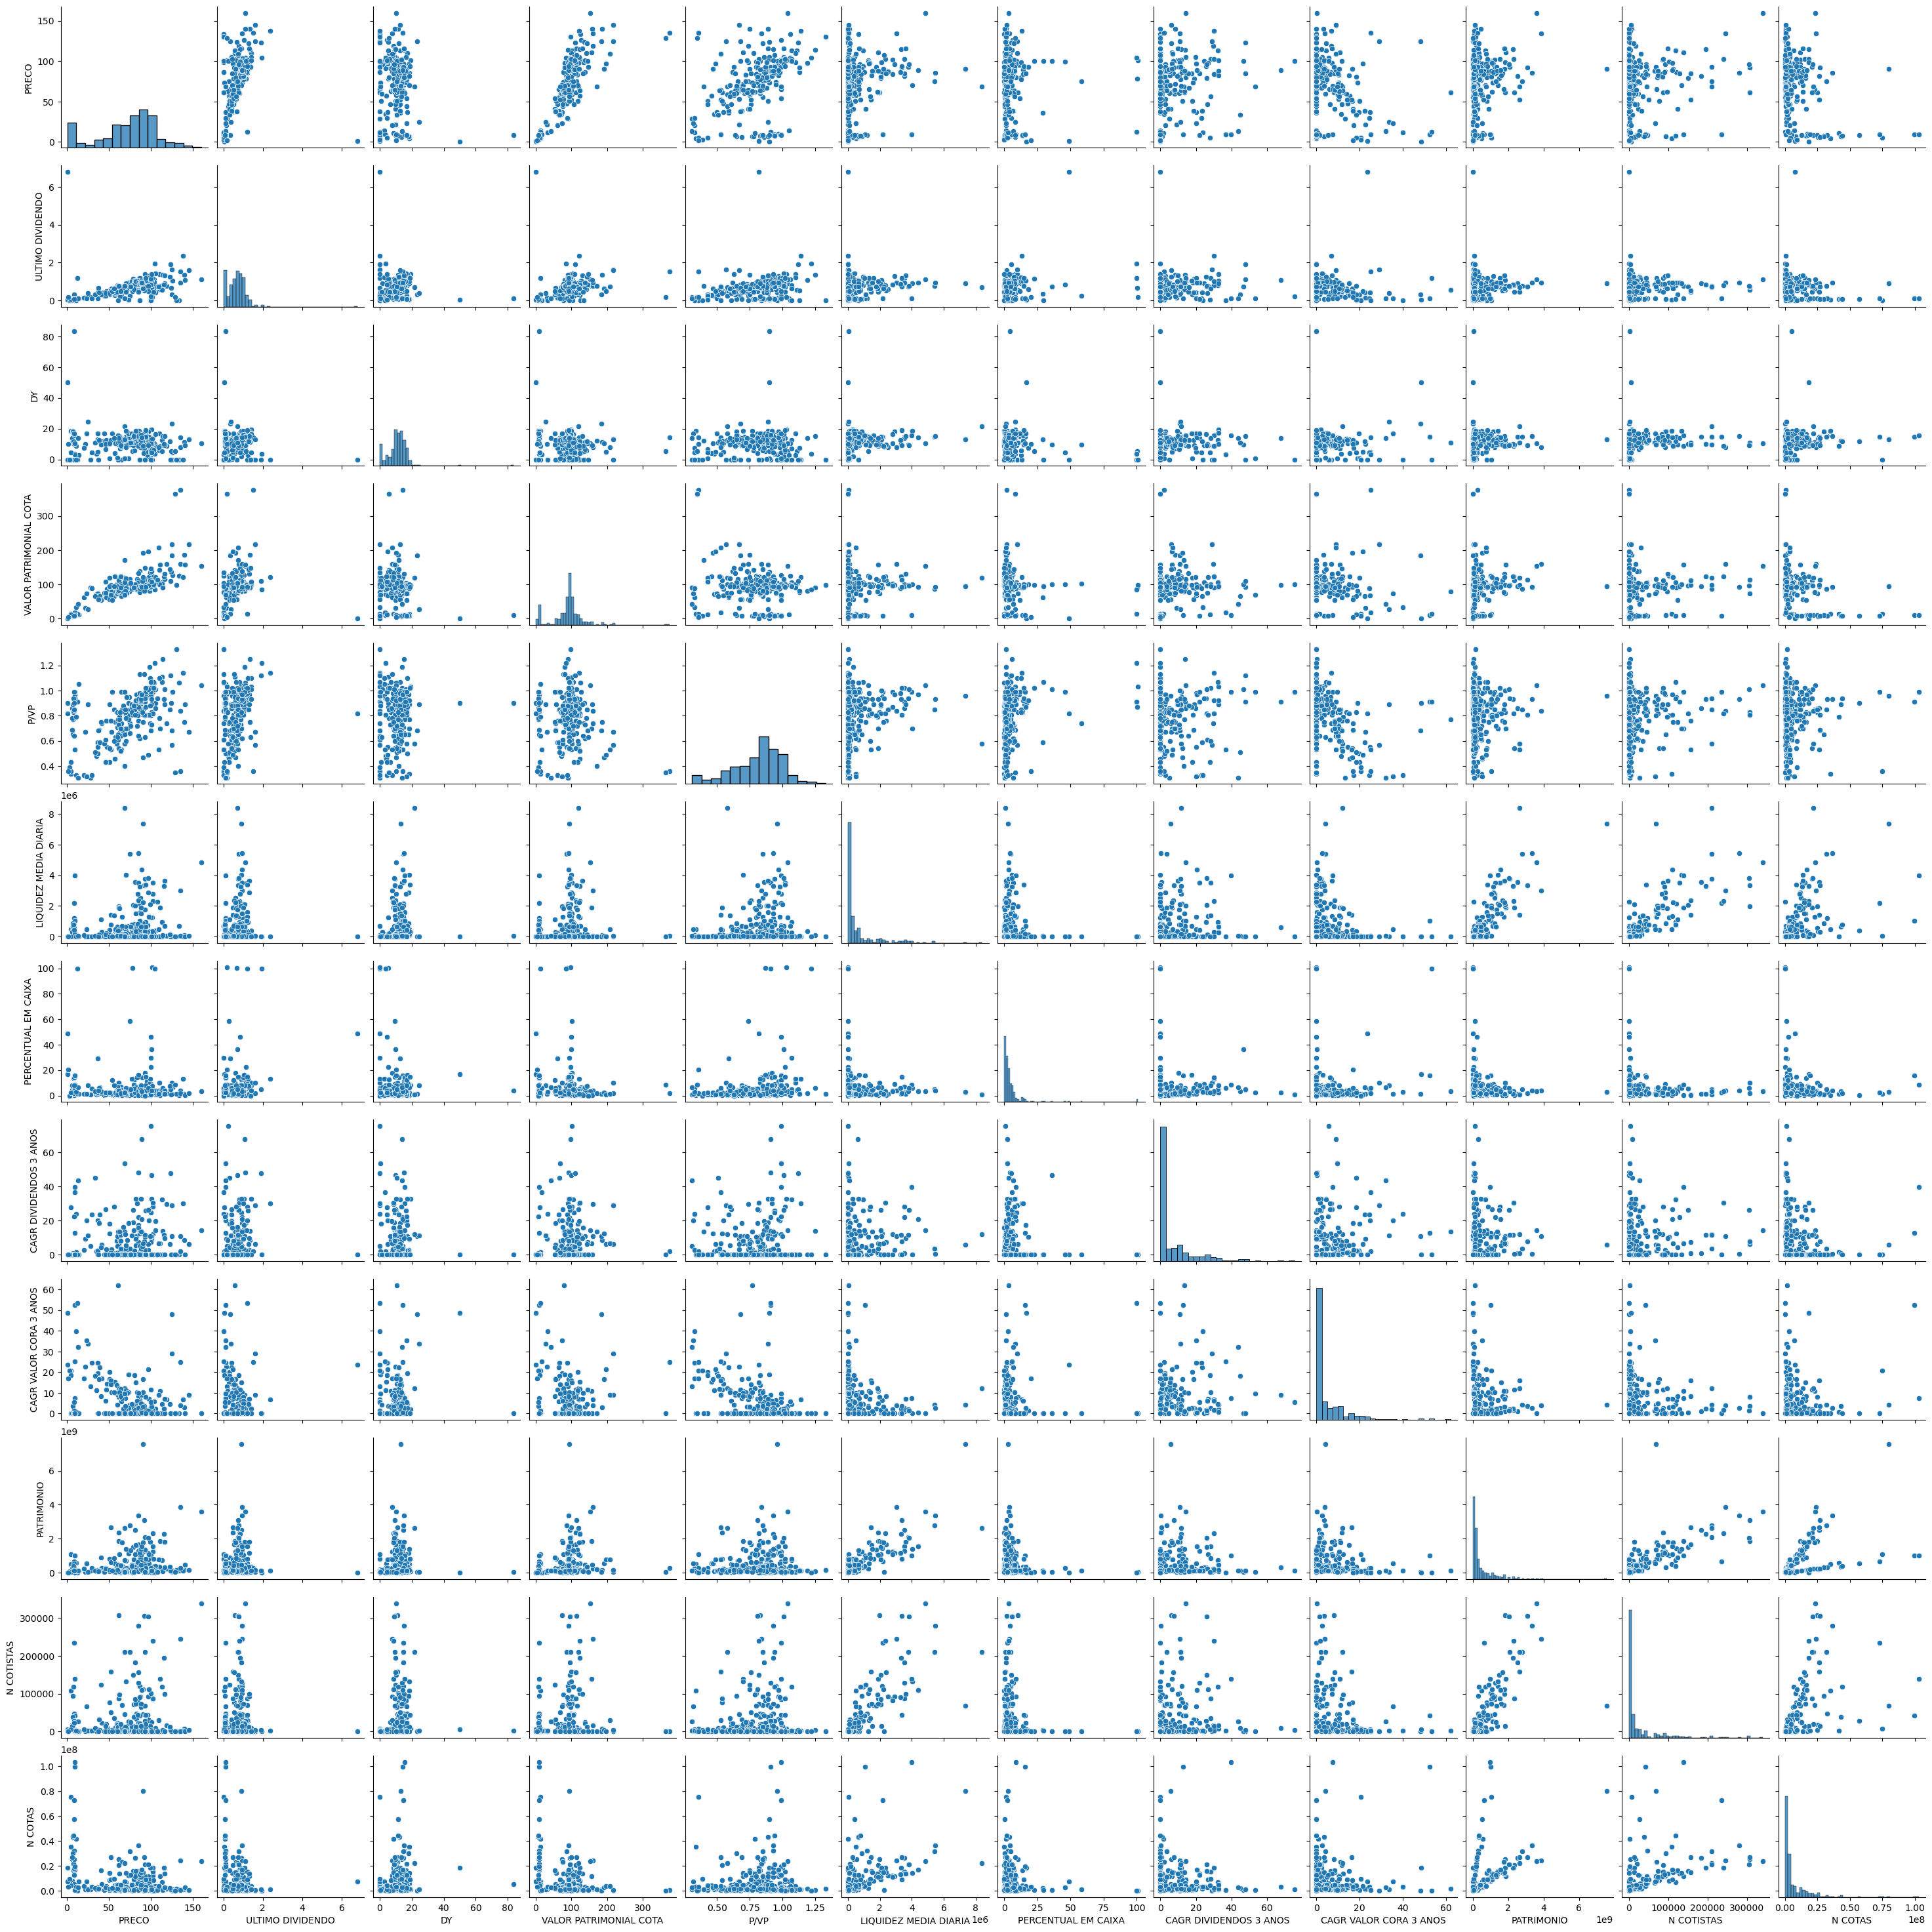

In [7]:
sns.pairplot(fiis_df)

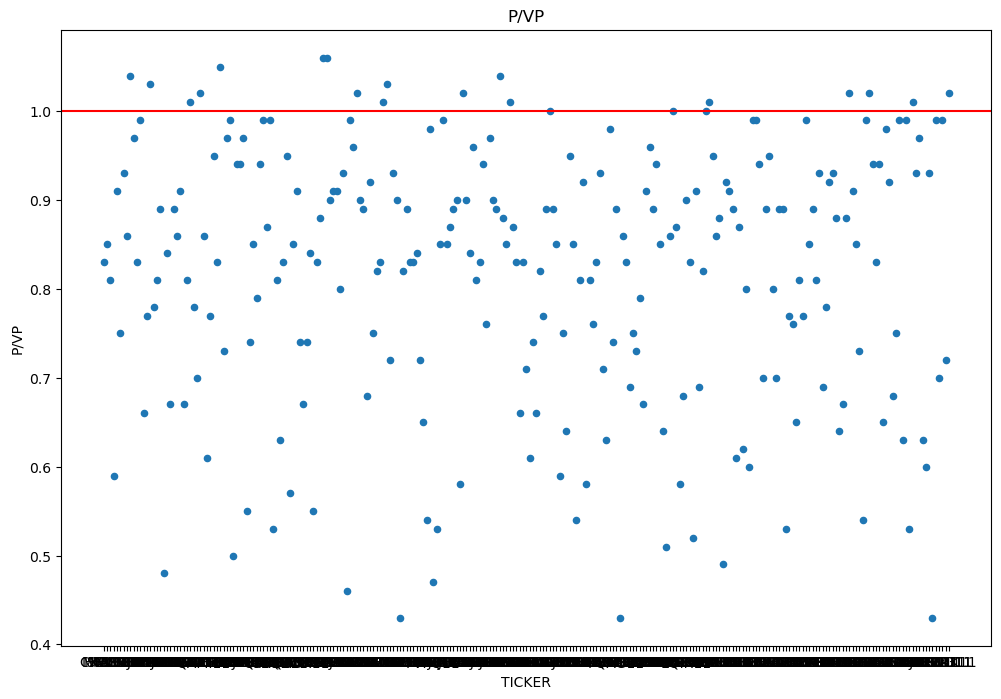

In [8]:
fiis_df.drop(fiis_df[(fiis_df['P/VP'] < np.percentile(fiis_df['P/VP'], 5)) | (fiis_df['P/VP'] > np.percentile(fiis_df['P/VP'], 95))].index, inplace=True)

ax = fiis_df.plot(x='TICKER', y='P/VP', kind='scatter', figsize=(12,8))
ax.set_title('P/VP')
ax.axhline(y=1, color='r')

plt.show()

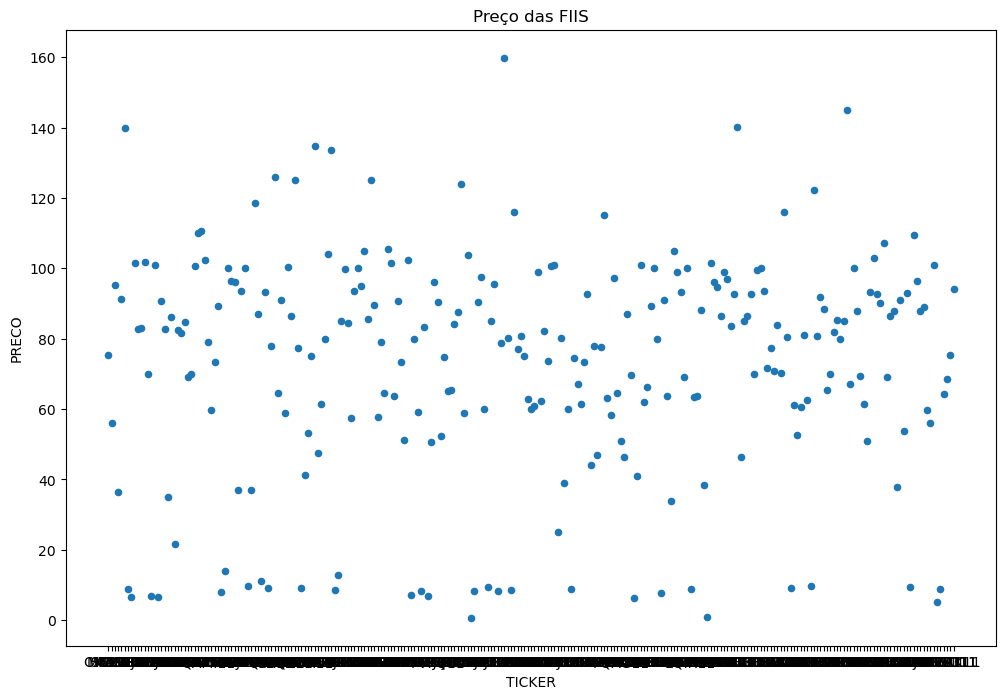

In [9]:
ax = fiis_df.plot(x='TICKER', y='PRECO', kind='scatter', figsize=(12,8))
ax.set_title('Preço das FIIS')

plt.show()

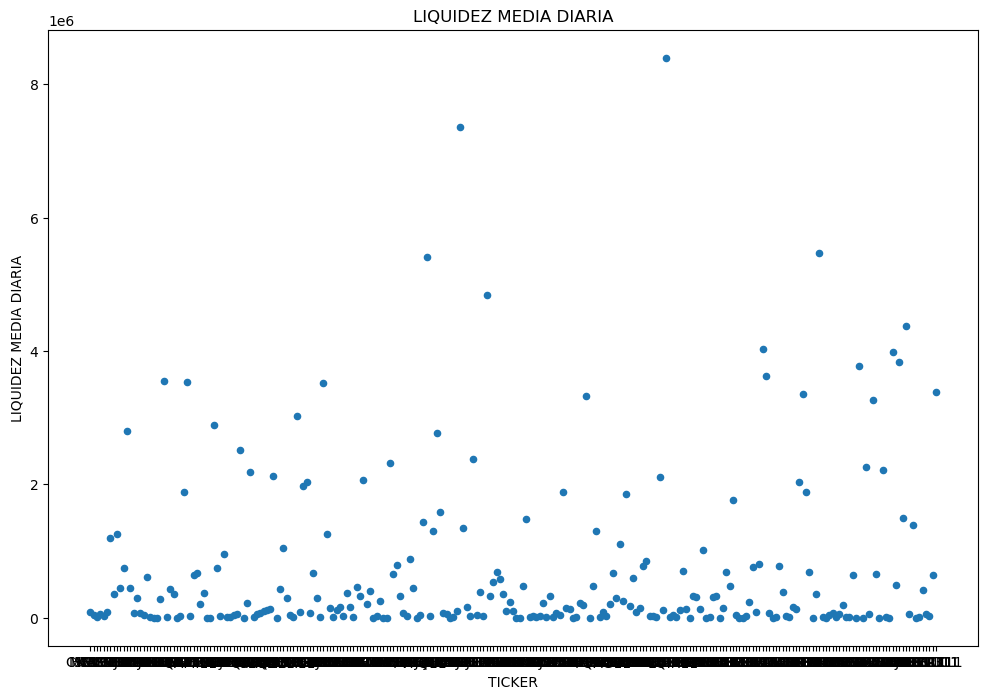

In [10]:
ax = fiis_df.plot(x='TICKER', y='LIQUIDEZ MEDIA DIARIA', kind='scatter', figsize=(12,8))
ax.set_title('LIQUIDEZ MEDIA DIARIA')

plt.show()

In [11]:
fiis_df.describe()

,PRECO,ULTIMO DIVIDENDO,DY,VALOR PATRIMONIAL COTA,P/VP,LIQUIDEZ MEDIA DIARIA,PERCENTUAL EM CAIXA,CAGR DIVIDENDOS 3 ANOS,CAGR VALOR CORA 3 ANOS,PATRIMONIO,N COTISTAS,N COTAS
count,255.000000,255.000000,255.000000,255.000000,255.000000,2.550000e+02,255.000000,255.000000,255.000000,2.550000e+02,255.000000,2.550000e+02
mean,72.959373,0.701861,11.506588,90.292706,0.818824,7.185151e+05,5.772235,6.875843,5.103765,5.240836e+08,33289.203922,7.957075e+06
std,31.854989,0.524409,7.048475,39.047612,0.147347,1.257473e+06,12.425250,11.724382,9.283087,8.157396e+08,62406.594554,1.371768e+07
min,0.690000,0.000000,0.000000,0.770000,0.430000,0.000000e+00,0.000000,0.000000,0.000000,1.682251e+06,6.000000,9.000000e+04
25%,59.865000,0.435000,9.125000,78.790000,0.725000,2.157827e+04,1.200000,0.000000,0.000000,1.024704e+08,1122.000000,1.162975e+06
50%,79.830000,0.720000,11.640000,95.270000,0.850000,1.609069e+05,2.700000,0.320000,0.210000,2.105133e+08,5171.000000,2.772204e+06
75%,93.550000,0.923911,14.525000,104.225000,0.930000,6.936674e+05,5.580000,10.495000,7.460000,5.659158e+08,29108.500000,9.087640e+06
max,159.880000,6.800000,83.640000,217.850000,1.060000,8.396044e+06,101.040000,75.400000,62.150000,7.561313e+09,339878.000000,1.032207e+08
